# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries (pandas,numpy, matplotlib etc)

In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Time_Series/Apple_Stock/appl_1980_2014.csv) or from the file appl_1980_2014.csv from the datasets folder.

In [2]:
pd.read_csv("C:/python_pandas/apple_stock/appl_1980_2014.csv")

Date   Open   High    Low  Close     Volume  Adj Close
0     2014-07-08  96.27  96.80  93.92  95.35   65130000      95.35
1     2014-07-07  94.14  95.99  94.10  95.97   56305400      95.97
2     2014-07-03  93.67  94.10  93.20  94.03   22891800      94.03
3     2014-07-02  93.87  94.06  93.09  93.48   28420900      93.48
4     2014-07-01  93.52  94.07  93.13  93.52   38170200      93.52
...          ...    ...    ...    ...    ...        ...        ...
8460  1980-12-18  26.63  26.75  26.63  26.63   18362400       0.41
8461  1980-12-17  25.87  26.00  25.87  25.87   21610400       0.40
8462  1980-12-16  25.37  25.37  25.25  25.25   26432000       0.39
8463  1980-12-15  27.38  27.38  27.25  27.25   43971200       0.42
8464  1980-12-12  28.75  28.87  28.75  28.75  117258400       0.45

[8465 rows x 7 columns]

### Step 3. Assign it to a variable apple

In [3]:
apple = pd.read_csv("C:/python_pandas/apple_stock/appl_1980_2014.csv")

### Step 4.  Check out the type of the columns

In [4]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [5]:
apple['Date'] = pd.to_datetime(apple.Date)

### Step 6.  Set the date as the index

In [6]:
apple.set_index('Date')

Open   High    Low  Close     Volume  Adj Close
Date                                                        
2014-07-08  96.27  96.80  93.92  95.35   65130000      95.35
2014-07-07  94.14  95.99  94.10  95.97   56305400      95.97
2014-07-03  93.67  94.10  93.20  94.03   22891800      94.03
2014-07-02  93.87  94.06  93.09  93.48   28420900      93.48
2014-07-01  93.52  94.07  93.13  93.52   38170200      93.52
...           ...    ...    ...    ...        ...        ...
1980-12-18  26.63  26.75  26.63  26.63   18362400       0.41
1980-12-17  25.87  26.00  25.87  25.87   21610400       0.40
1980-12-16  25.37  25.37  25.25  25.25   26432000       0.39
1980-12-15  27.38  27.38  27.25  27.25   43971200       0.42
1980-12-12  28.75  28.87  28.75  28.75  117258400       0.45

[8465 rows x 6 columns]

### Step 7.  Is there any duplicate dates?

In [12]:
apple.duplicated().sum()

0

### Step 8.  The index is from the most recent date. Sort the data so that the first entry is the oldest date.

In [11]:
apple['Date'].sort_values(ascending = True)


8464   1980-12-12
8463   1980-12-15
8462   1980-12-16
8461   1980-12-17
8460   1980-12-18
          ...    
4      2014-07-01
3      2014-07-02
2      2014-07-03
1      2014-07-07
0      2014-07-08
Name: Date, Length: 8465, dtype: datetime64[ns]

### Step 9. Get the last business day of each month

In [13]:
apple['Date'] = pd.to_datetime(apple['Date'])

apple.loc[apple.Date.isin(apple.Date + pd.offsets.BMonthEnd(1))]

Date    Open    High     Low   Close     Volume  Adj Close
5    2014-06-30   92.10   93.73   92.09   92.93   49482300      92.93
26   2014-05-30  637.98  644.17  628.90  633.00  141005200      90.43
47   2014-04-30  592.64  599.43  589.80  590.09  114160200      83.83
68   2014-03-31  539.23  540.81  535.93  536.74   42167300      76.25
89   2014-02-28  529.08  532.75  522.12  526.24   92992200      74.76
...         ...     ...     ...     ...     ...        ...        ...
8369 1981-04-30   28.38   28.62   28.38   28.38    3152800       0.44
8390 1981-03-31   24.75   24.75   24.50   24.50    3998400       0.38
8412 1981-02-27   26.50   26.75   26.50   26.50    3690400       0.41
8431 1981-01-30   28.50   28.50   28.25   28.25   11547200       0.44
8452 1980-12-31   34.25   34.25   34.13   34.13    8937600       0.53

[395 rows x 7 columns]

### Step 10.  What is the difference in days between the first day and the oldest

In [14]:
oldest_date = apple['Date'].min()
first_date = apple['Date'].max()
diff = first_date-oldest_date 
diff

Timedelta('12261 days 00:00:00')

### Step 11.  How many months in the data we have?

In [15]:
apple['Date']= pd.to_datetime(apple['Date'])
apple['month'] = apple['Date'].dt.month
months = apple['month'].count()
print("Total Months in the data",months)


Total Months in the data 8465


### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

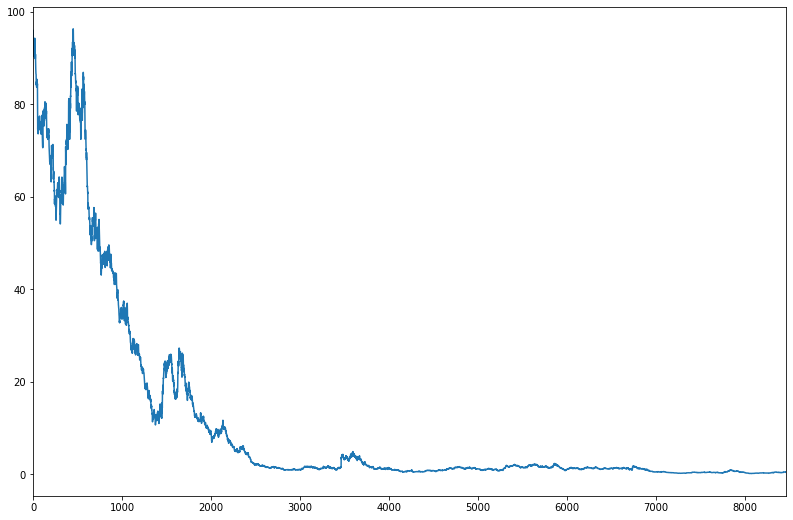

In [16]:
apple['Adj Close'].plot(figsize=(13.5,9))